In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\kesha\\Downloads\\urldata.csv\\urldata.csv')

# Inspect data
df.sample(100)


,Unnamed: 0,url,label,result
445023,445023,http://fyinutrition.com/dspt/,malicious,1
127272,127272,https://www.absoluteastronomy.com/topics/Suzy_...,benign,0
336131,336131,https://www.youtube.com/watch?v=oOSS4dF-NCQ,benign,0
439023,439023,http://cbfmrembang.com/wp-admin/ftpuser/norton...,malicious,1
62392,62392,https://www.joshkasuboski.com/,benign,0
...,...,...,...,...
293919,293919,https://www.spiritus-temporis.com/mary-pierce/,benign,0
260588,260588,https://www.nationalreview.com/corner/280358/r...,benign,0
307507,307507,https://www.topix.net/forum/city/princeton-wv/...,benign,0
313255,313255,https://www.ucmp.berkeley.edu/,benign,0


In [130]:
import pandas as pd
df = pd.read_csv('C:\\Users\\kesha\\Downloads\\urldata.csv\\urldata.csv')

from urllib.parse import urlparse
import re
import ipaddress

# feature extraction function
def featureExtraction(url):
    features = []
    try:
        # Feature 1: Check for IP address in URL
        def havingIP(url):
            try:
                ipaddress.ip_address(urlparse(url).netloc)
                return 1
            except ValueError:
                return 0
        
        # Feature 2: Check for "@" symbol in URL
        def haveAtSign(url):
            return 1 if "@" in url else 0

        # Feature 3: Length of URL
        def getLength(url):
            return 1 if len(url) >= 54 else 0

        # Feature 4: Depth of URL
        def getDepth(url):
            path = urlparse(url).path.split('/')
            return len([segment for segment in path if segment])

        # Feature 5: Check if URL uses shortening services
        def tinyURL(url):
            # List of known shortening services
            shortening_services = r"(bit\.ly|goo\.gl|tinyurl\.com|ow\.ly|t\.co|is\.gd|shorte\.st|x\.co|tr\.im|cli\.gs|yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|tweez\.me|v\.gd|q\.gs|post\.ly|bkite\.com|snipr\.com|fic\.kr|loopt\.us|doiop\.com|short\.ie|kl\.am|rubyurl\.com|om\.ly|to\.ly)"
            return 1 if re.search(shortening_services, url) else 0


        # Add features to the list
        features.append(havingIP(url))
        features.append(haveAtSign(url))
        features.append(getLength(url))
        features.append(getDepth(url))
        features.append(tinyURL(url))

    except Exception as e:
        # Handle any exceptions or error
        print(f"Error processing URL {url}: {e}")
        return [None] * 5
    
    return features

# Take a copy of the data to avoid SettingWithCopyWarning
df_sample = df.copy() 
df_sample['features'] = df_sample['url'].apply(featureExtraction)

# Convert the features into separate columns
df_features = pd.DataFrame(df_sample['features'].tolist(), index=df_sample.index, columns=['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL'])

# Combine the extracted features with the original DataFrame
df_combined = pd.concat([df_sample, df_features], axis=1)
print(df_combined)


Error processing URL http://ladiesfirst-privileges[.]com/656465/d5678h9.exe: '.' does not appear to be an IPv4 or IPv6 address
        Unnamed: 0                                                url  \
0                0                             https://www.google.com   
1                1                            https://www.youtube.com   
2                2                           https://www.facebook.com   
3                3                              https://www.baidu.com   
4                4                          https://www.wikipedia.org   
...            ...                                                ...   
450171      450171        http://ecct-it.com/docmmmnn/aptgd/index.php   
450172      450172  http://faboleena.com/js/infortis/jquery/plugin...   
450173      450173  http://faboleena.com/js/infortis/jquery/plugin...   
450174      450174                             http://atualizapj.com/   
450175      450175  http://writeassociate.com/test/Portal/inicio/I... 

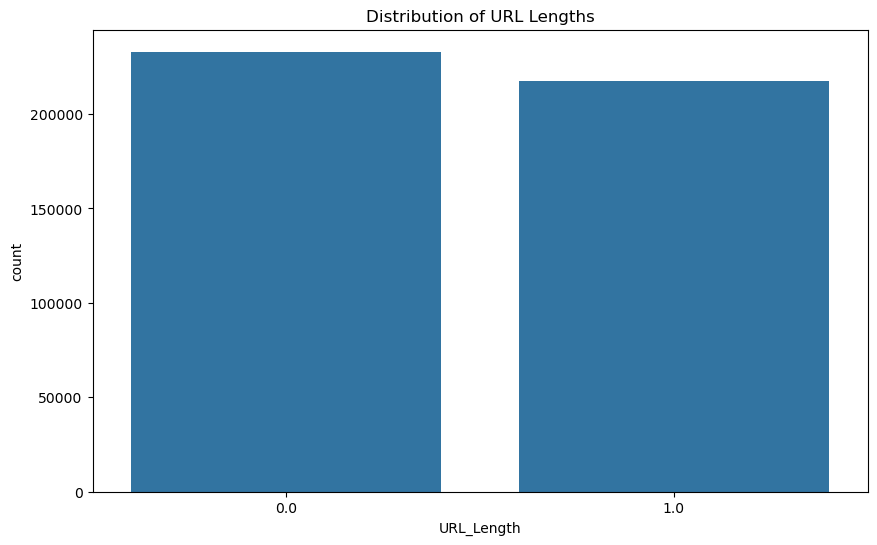

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Bar plot of URL_Length feature (Not that useful)
sns.countplot(x='URL_Length', data=df_combined)
plt.title('Distribution of URL Lengths')
plt.show()


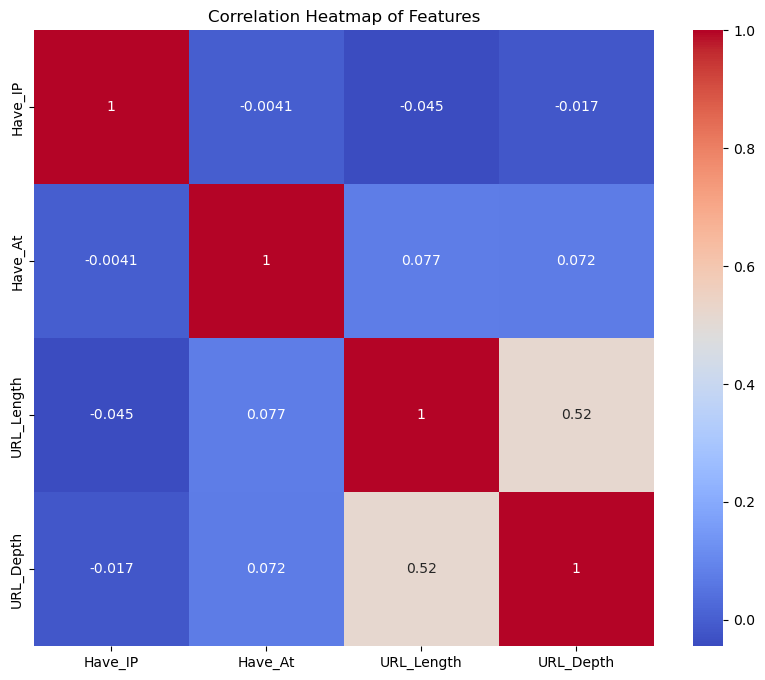

In [75]:
# Create Heatmap for correlations (Also not extremely useful)
df_corr = df_combined[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of Features')
plt.show()

In [113]:
# Apply feature extraction and convert features into separate columns
df_combined[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL']] = df_combined['url'].apply(lambda x: pd.Series(featureExtraction(x)))

# check
print(df_combined[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL']].head())


Error processing URL http://ladiesfirst-privileges[.]com/656465/d5678h9.exe: '.' does not appear to be an IPv4 or IPv6 address
   Have_IP  Have_At  URL_Length  URL_Depth  TinyURL
0      0.0      0.0         0.0        0.0      1.0
1      0.0      0.0         0.0        0.0      1.0
2      0.0      0.0         0.0        0.0      1.0
3      0.0      0.0         0.0        0.0      1.0
4      0.0      0.0         0.0        0.0      1.0


In [119]:
# Check head before scaling
print(df_combined[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL']].head())


    Have_IP   Have_At  URL_Length  URL_Depth  TinyURL
0 -0.080045 -0.081286   -0.965534  -1.348418      0.0
1 -0.080045 -0.081286   -0.965534  -1.348418      0.0
2 -0.080045 -0.081286   -0.965534  -1.348418      0.0
3 -0.080045 -0.081286   -0.965534  -1.348418      0.0
4 -0.080045 -0.081286   -0.965534  -1.348418      0.0


In [134]:
# Print the head URLs and their extracted features
for i in range(5):
    print(f"URL: {df_combined['url'].iloc[i]}")
    print(f"Extracted features: {featureExtraction(df_combined['url'].iloc[i])}")


URL: https://www.google.com
Extracted features: [0, 0, 0, 0, 0]
URL: https://www.youtube.com
Extracted features: [0, 0, 0, 0, 0]
URL: https://www.facebook.com
Extracted features: [0, 0, 0, 0, 0]
URL: https://www.baidu.com
Extracted features: [0, 0, 0, 0, 0]
URL: https://www.wikipedia.org
Extracted features: [0, 0, 0, 0, 0]


In [138]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL']

# Initialize scaler
scaler = StandardScaler()

# Scale features
df_combined[numerical_features] = scaler.fit_transform(df_combined[numerical_features])

# Check
print(df_combined[numerical_features].head())


    Have_IP   Have_At  URL_Length  URL_Depth   TinyURL
0 -0.080045 -0.081286   -0.965534  -1.348418 -0.266035
1 -0.080045 -0.081286   -0.965534  -1.348418 -0.266035
2 -0.080045 -0.081286   -0.965534  -1.348418 -0.266035
3 -0.080045 -0.081286   -0.965534  -1.348418 -0.266035
4 -0.080045 -0.081286   -0.965534  -1.348418 -0.266035


In [144]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

numerical_features = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'TinyURL']

# Define X (features) and y (target)
X = df_combined[numerical_features]
y = df_combined['result']

# Step 1: Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Use SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6459527300191035
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74     68921
           1       0.35      0.58      0.44     21115

    accuracy                           0.65     90036
   macro avg       0.59      0.62      0.59     90036
weighted avg       0.72      0.65      0.67     90036



In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare the data (0 for benign, 1 for phishing)

# Tokenize the URLs (character-level tokenization)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df_combined['url'])

# Convert the URLs into sequences of integers
url_sequences = tokenizer.texts_to_sequences(df_combined['url'])

# Pad the sequences to make them of equal length
max_sequence_length = 100  # can be adjusted based on data
X = pad_sequences(url_sequences, maxlen=max_sequence_length)

# Target labels
y = df_combined['result'].values

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the GRU model
vocab_size = len(tokenizer.word_index) + 1  # Total number of unique characters
embedding_dim = 50  # Size of the character embedding vectors

model = Sequential()

# Embedding layer (convert each character to a dense vector)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# GRU layer
model.add(GRU(128, return_sequences=False))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/5


C:\Users\kesha\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2814/2814 ━━━━━━━━━━━━━━━━━━━━ 957s 338ms/step - accuracy: 0.9411 - loss: 0.1602 - val_accuracy: 0.9929 - val_loss: 0.0247
Epoch 2/5
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 996s 342ms/step - accuracy: 0.9936 - loss: 0.0228 - val_accuracy: 0.9942 - val_loss: 0.0218
Epoch 3/5
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 934s 325ms/step - accuracy: 0.9952 - loss: 0.0178 - val_accuracy: 0.9952 - val_loss: 0.0170
Epoch 4/5
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 842s 297ms/step - accuracy: 0.9959 - loss: 0.0150 - val_accuracy: 0.9958 - val_loss: 0.0148
Epoch 5/5
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 962s 342ms/step - accuracy: 0.9964 - loss: 0.0130 - val_accuracy: 0.9961 - val_loss: 0.0142
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 113s 40ms/step - accuracy: 0.9963 - loss: 0.0148
Test Accuracy: 0.9961126446723938
